In [3]:
import git
import os
import sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
pwd

'/Users/krystian.safjan/projects/priv/blog'

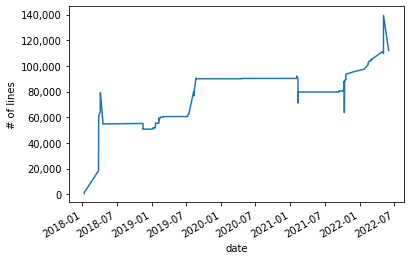

In [6]:
git_dir='.'
branch='master'
try:
    repo = git.repo.Repo(git_dir)
except:
    print("Exception of type: {}\nDir. not a valid git project: {}".
          format(sys.exc_info()[0], git_dir))
    exit()

data = []
for i in reversed(list(repo.iter_commits(rev=branch))):
    diff = i.stats.total
    data.append([i.committed_datetime.isoformat(),
                 diff['insertions'],
                 diff['deletions']])

data = pd.DataFrame(data, columns=["date", "add", "remove"])
data['delta'] = data['add'] - data['remove']
data['total'] = data.delta.cumsum()
data.date = pd.to_datetime(data.date)
data.set_index(['date'], inplace=True)

plt.figure("Code Lines Progress in project {}".
           format(os.path.basename(git_dir)))
plt.ylabel("# of lines")
ax = data['total'].plot()
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [7]:
data

,add,remove,delta,total
date,,,,
2018-01-11 13:04:58+01:00,679,0,679,679
2018-01-11 13:07:17+01:00,771,32,739,1418
2018-01-11 13:10:43+01:00,1,1,0,1418
2018-01-11 13:12:26+01:00,71,71,0,1418
2018-03-27 11:31:07+02:00,18327,1379,16948,18366
...,...,...,...,...
2022-05-06 15:18:12+02:00,18042,2806,15236,129973
2022-05-06 15:21:47+02:00,26589,17132,9457,139430
2022-05-06 15:29:25+02:00,2,0,2,139432
